In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re
from collections import defaultdict
%matplotlib inline 

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df = pd.read_csv('./amazon_jobs_dataset.csv')
print('dataset loaded')

dataset loaded


In [ ]:
df.head(5)
tmp = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                3493 non-null   int64 
 1   Title                     3493 non-null   object
 2   location                  3493 non-null   object
 3   Posting_date              3493 non-null   object
 4   DESCRIPTION               3484 non-null   object
 5   BASIC QUALIFICATIONS      3484 non-null   object
 6   PREFERRED QUALIFICATIONS  3484 non-null   object
dtypes: int64(1), object(6)
memory usage: 191.1+ KB


In [ ]:
location = df['location'].unique();
location

array(['US, WA, Seattle ', 'IN, KA, Bangalore ', 'US, CA, Cupertino ',
       'RO, Iaşi ', 'US, CA, East Palo Alto ', 'US, CA, Santa Monica ',
       'US, CA, Sunnyvale ', 'US, CA, Palo Alto ', 'US, MA, Boston ',
       'US, MA, Cambridge ', 'CA, BC, Vancouver ', 'US, TX, Austin ',
       'IN, TS, Hyderabad ', 'US, CA, San Francisco ', 'DE, BY, Munich ',
       'RO, Iasi ', 'PL, Gdansk ', 'PL, Bielany Wroclawskie ',
       'DE, Berlin ', 'US, CA, Irvine ', 'CA, ON, Toronto ',
       'US, MA, North Reading ', 'US, MN, Minneapolis ', 'AE, Dubai ',
       'US, CA, San Diego ', 'US, CA, Santa Barbara ',
       'US, OR, Portland ', 'ES, Madrid ', 'IT, Vercelli ',
       'US, NJ, Newark ', 'US, NY, New York ', 'IN, TN, Chennai ',
       'IL, Herzliya ', 'DE, Aachen ', 'US, MA, Westborough ',
       'US, VA, Herndon ', 'US, WA, Bellevue ', 'UK, London ',
       'ZA, Cape Town ', 'US, MA, Andover ', 'US, CO, Boulder ',
       'US, CA, Santa Cruz ', 'US, CA, San Luis Obispo ',
       'UK, Cambr

In [ ]:
#Filter by location
df = df[df['location'].str.contains('Vancouver')]

In [ ]:
df = df[df['Title'].str.contains('Software Development Engineer')]

In [ ]:
df.Posting_date = pd.to_datetime(df.Posting_date)

In [ ]:
tmp = df.groupby([df.Posting_date.dt.year, df.Title]).sum().reset_index().set_index('Posting_date')

In [ ]:
tmp = tmp.reset_index()

In [ ]:
part1 = pd.DataFrame(tmp)

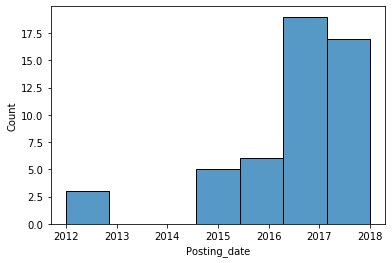

In [ ]:
#Nombre de job chez AWS lors des années 2012 a 2018 (Données continues)
sns.histplot(data=part1, x="Posting_date")

In [ ]:
tmp2 = df.groupby([df.Posting_date, df.Title]).sum().reset_index().set_index('Posting_date')

In [ ]:
tmp2 = tmp2.reset_index()

In [ ]:
part2 = pd.DataFrame(tmp2)

<module 'matplotlib.pyplot' from '/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/pyplot.py'>

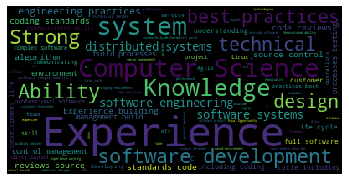

In [40]:
#Generate worldcloud to see what comes up
text = df['PREFERRED QUALIFICATIONS'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt

In [ ]:
languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php', 'javascript', 'objectivec', 'ruby', 'perl','c','c#']

In [ ]:
# get our BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns and and convert all of the values to a list
qualifications = df['BASIC QUALIFICATIONS'].tolist() + df['PREFERRED QUALIFICATIONS'].tolist()

# joining the list to a single string and lower case the letter
qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower()

In [ ]:
wordcount = dict((x , 0) for x in languages_list)
for w in re.findall(r"[[\w'+#-]+|[.!?;’]", qualifications_string):
    if w in wordcount:
        wordcount[w] += 1

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Possible nested set at position 1
  


In [ ]:
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
# make a new dataframe from programming languages and their popularity
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
# Capitalize each programming language first letter
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
df_popular_programming_lang = df_popular_programming_lang[::-1] # all items in the array, reversed

In [ ]:
df_popular_programming_lang

,Language,Popularity
17,Objectivec,0
16,Php,0
15,Pig,0
14,Cosmos,0
13,Matlab,0
12,Swift,0
11,Spark,1
10,Mysql,1
9,Mongodb,1
8,Hadoop,4


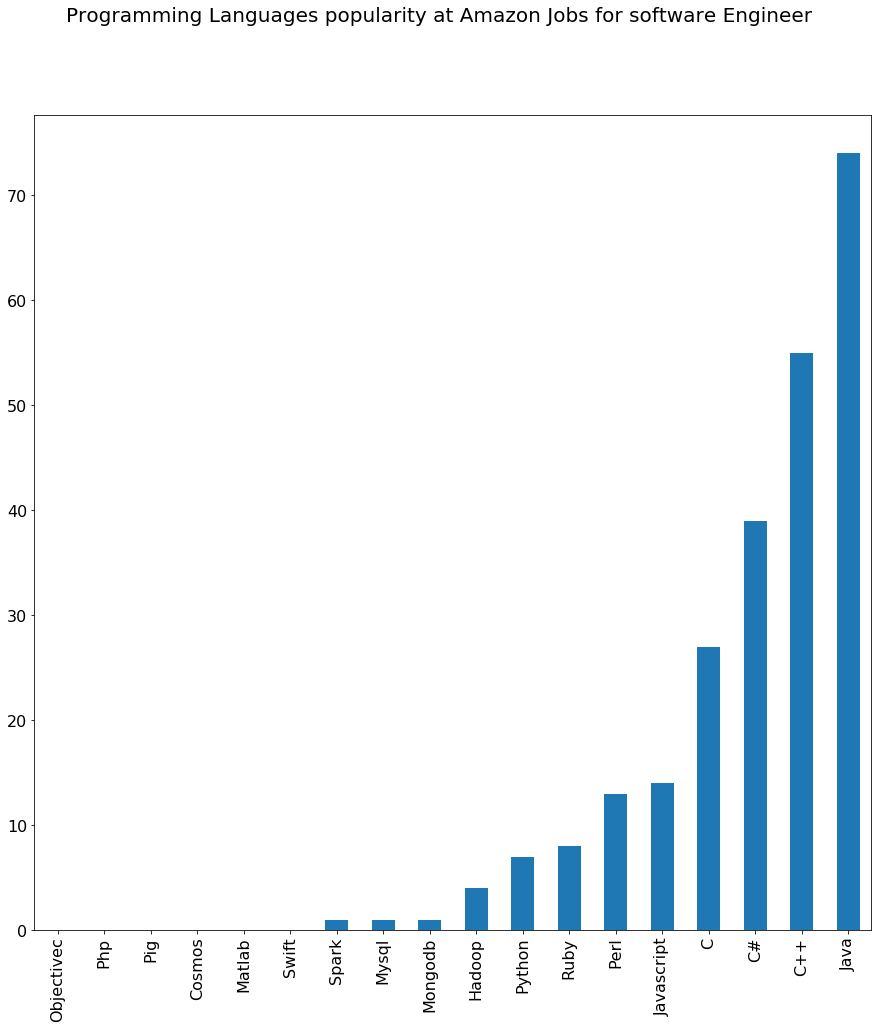

In [ ]:
df_popular_programming_lang.plot.bar(x='Language',y='Popularity',figsize=(15,15), legend=False)

plt.suptitle("Programming Languages popularity at Amazon Jobs for software Engineer", fontsize=20)
# set xlabel to ""

plt.xlabel("")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
basic_qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications)

In [ ]:
years = defaultdict(lambda: 0)

for w in re.findall(r'([0-9]) ', basic_qualifications_string):
     years[w] += 1

In [ ]:
years = sorted(years.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
df_years = pd.DataFrame(years,columns=['Years of experience','Popularity'])
df_years = df_years[::-1] 

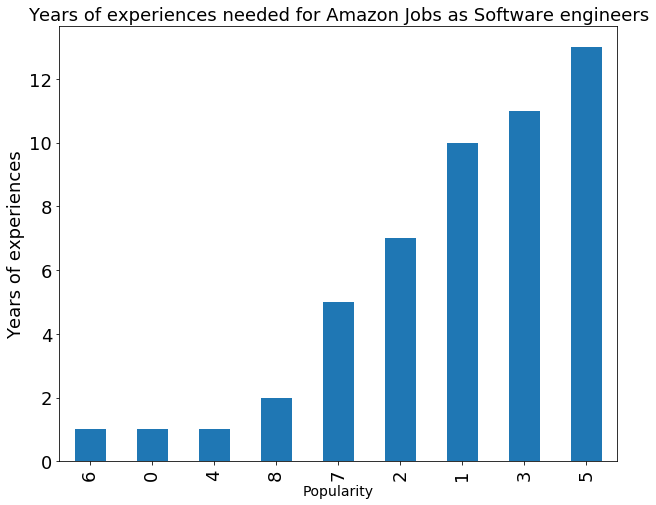

In [ ]:
df_years.plot.bar(x='Years of experience',y='Popularity',figsize=(10, 8), legend=False,stacked=True)
# add a suptitle
plt.title("Years of experiences needed for Amazon Jobs as Software engineers", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Years of experiences",fontsize=18)
# change xticks fontsize to 14
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# finally show the plot
plt.show()